In [1]:
import requests
import os.path
import pandas as pd
from ydata_profiling import ProfileReport # pip install ydata-profiling
import matplotlib.pyplot as plt

# Load datasets

In [2]:
if not os.path.isfile('../data/mp_characteristics_V2_19492021.tab'):
    print('Downloading mp_characteristics dataset...')
    with open('../data/mp_characteristics_V2_19492021.tab', 'wb') as out_file:
        content = requests.get('https://dataverse.harvard.edu/api/access/datafile/6402444', stream=True).content
        out_file.write(content)
if not os.path.isfile('../data/vote_characteristics_V2_19492021.tab'):
    print('Downloading vote_characteristics dataset...')
    with open('../data/vote_characteristics_V2_19492021.tab', 'wb') as out_file:
        content = requests.get('https://dataverse.harvard.edu/api/access/datafile/6402442', stream=True).content
        out_file.write(content)
if not os.path.isfile('../data/voting_behavior_V2_19492021.dta'):
    print('Downloading voting_behavior dataset...')
    with open('../data/voting_behavior_V2_19492021.dta', 'wb') as out_file:
        content = requests.get('https://dataverse.harvard.edu/api/access/datafile/6402445', stream=True).content
        out_file.write(content)

mp_char = pd.read_csv('../data/mp_characteristics_V2_19492021.tab', sep='\t')
vote_char = pd.read_csv('../data/vote_characteristics_V2_19492021.tab', sep='\t')
voting_beh = pd.read_stata('../data/voting_behavior_V2_19492021.dta')

# Create profile reports

In [ ]:
mp_char_report = ProfileReport(mp_char)
mp_char_report.to_file('../data/reports/mp_char.html')
vote_char_report = ProfileReport(vote_char)
vote_char_report.to_file('../data/reports/vote_char.html')
voting_beh_report = ProfileReport(voting_beh)
voting_beh_report.to_file('../data/reports/voting_beh.html')

## Inspect data

In [3]:
mp_char.head()

,id_de_parliament,lastname,firstname,elecper,gender,year_birth,date_birth,date_birth_text,mandate_start,mandate_end,...,whip,partyid_cmp,partyid_ches,partyid_bl,partyid_parlgov,partyid_parlgov2,id_de_parliament_string,mp_id_old,pers_id_pdbd,id_de_manow
0,11000001.0,Abelein,Manfred,8,male,1930,1930-10-20,20/10/1930,1976-12-14,1980-11-04,...,no,41521.0,NaN,NaN,1727.0,808.0,11000001,10.0,DE_Abelein_Manfred_1930,10
1,11000001.0,Abelein,Manfred,7,male,1930,1930-10-20,20/10/1930,1972-12-13,1976-12-13,...,no,41521.0,NaN,NaN,1727.0,808.0,11000001,10.0,DE_Abelein_Manfred_1930,10
2,11000001.0,Abelein,Manfred,11,male,1930,1930-10-20,20/10/1930,1987-02-18,1990-12-20,...,no,41521.0,NaN,NaN,1727.0,808.0,11000001,10.0,DE_Abelein_Manfred_1930,10
3,11000001.0,Abelein,Manfred,6,male,1930,1930-10-20,20/10/1930,1969-10-20,1972-09-22,...,no,41521.0,NaN,NaN,1727.0,808.0,11000001,10.0,DE_Abelein_Manfred_1930,10
4,11000001.0,Abelein,Manfred,9,male,1930,1930-10-20,20/10/1930,1980-11-04,1983-03-29,...,no,41521.0,NaN,NaN,1727.0,808.0,11000001,10.0,DE_Abelein_Manfred_1930,10


In [5]:
mp_char['id_de_parliament_string'].unique()

array(['11000001', '11000002', '11000003', ..., '11004972', '55555556',
       '66666664'], dtype=object)

In [6]:
vote_char.head()

,vote_id,vote_id2,vote_id_elecper,elecper,source,vote_title,vote_type,vote_finalpassage,vote_numproposals,policy1,...,gesta,cabid_parlgov,cabid_erdda,cabinet,cab_start,cab_end,elecper_start,elecper_end,cab_parties,vote_date
0,1001,1001.0,1,1,01/069/2520,Entwurf eines Gesetzes über den Beitritt der B...,bill,yes,no,international affairs and foreign aid,...,,147.0,601.0,Adenauer I,1949-09-15,1953-09-06,1949-08-14,1953-09-06,"CDU/CSU, FDP, DP",1950-06-15
1,1002,1002.0,2,1,01/076/2738,Handschriftlicher Änderungsantrag der Abgeordn...,amendment to bill,no,no,"law, crime, and family issues",...,,147.0,601.0,Adenauer I,1949-09-15,1953-09-06,1949-08-14,1953-09-06,"CDU/CSU, FDP, DP",1950-07-14
2,1003,1003.0,3,1,01/079/2923,Artikel I Ziffer 2 des Entwurfs eines Gesetzes...,bill,no,no,macroeconomics (including bugdet),...,,147.0,601.0,Adenauer I,1949-09-15,1953-09-06,1949-08-14,1953-09-06,"CDU/CSU, FDP, DP",1950-07-26
3,1004,1004.0,4,1,01/150/5989,Antrag der Fraktion der Deutschen Partei betre...,motion,no,no,government operations,...,,147.0,601.0,Adenauer I,1949-09-15,1953-09-06,1949-08-14,1953-09-06,"CDU/CSU, FDP, DP",1951-06-08
4,1005,1005.0,5,1,01/183/7787,Artikel I des Entwurfs eines Gesetzes betreffe...,bill,no,no,Foreign Trade,...,,147.0,601.0,Adenauer I,1949-09-15,1953-09-06,1949-08-14,1953-09-06,"CDU/CSU, FDP, DP",1952-01-10


In [7]:
voting_beh.head()

,id_de_parliament,lastname,firstname,party_det,ppg,party_text,elecper,office_spell,vote_id,vote_date,vote_beh,vote_deviate,mp_id_old,pers_id_pdbd,id_de_manow
0,11000001.0,Abelein,Manfred,CDU (Christian Democratic Union),CDU/CSU,CDU,11,1.0,11106.0,1988-11-25,no,no deviation,10.0,DE_Abelein_Manfred_1930,10
1,11000001.0,Abelein,Manfred,CDU (Christian Democratic Union),CDU/CSU,CDU,8,1.0,8028.0,1978-02-16,no,no deviation,10.0,DE_Abelein_Manfred_1930,10
2,11000001.0,Abelein,Manfred,CDU (Christian Democratic Union),CDU/CSU,CDU,9,1.0,9002.0,1981-03-18,no,no deviation,10.0,DE_Abelein_Manfred_1930,10
3,11000001.0,Abelein,Manfred,CDU (Christian Democratic Union),CDU/CSU,CDU,10,1.0,10051.0,1985-06-21,no,no deviation,10.0,DE_Abelein_Manfred_1930,10
4,11000001.0,Abelein,Manfred,CDU (Christian Democratic Union),CDU/CSU,CDU,11,1.0,11194.0,1990-04-26,unexcused absent,unexcused absent,10.0,DE_Abelein_Manfred_1930,10


In [8]:
voting_beh['vote_beh'].unique()

['no', 'unexcused absent', 'abstain', 'yes', 'excused absence', 'voting behavior not/wrongly protocolled', 'invalid vote']
Categories (7, object): ['excused absence' < 'yes' < 'no' < 'abstain' < 'unexcused absent' < 'invalid vote' < 'voting behavior not/wrongly protocolled']

## Plot distribution of voting behaviour categories

[Text(0, 0, 'yes'),
 Text(1, 0, 'no'),
 Text(2, 0, 'excused absence'),
 Text(3, 0, 'unexcused absent'),
 Text(4, 0, 'abstain'),
 Text(5, 0, 'voting behavior not/wrongly protocolled'),
 Text(6, 0, 'invalid vote')]

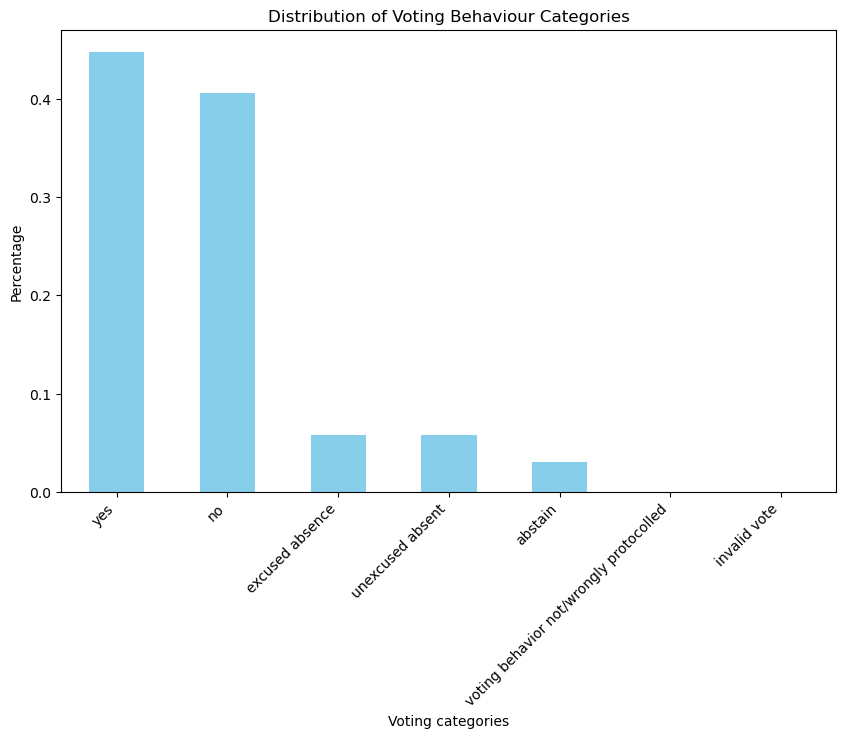

In [12]:
plt.figure(figsize=(10, 6))
ax = voting_beh['vote_beh'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
ax.set_title('Distribution of Voting Behaviour Categories')
ax.set_xlabel('Voting categories')
ax.set_ylabel('Percentage')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

## Plot distribution of parties

[Text(0, 0, 'SPD'),
 Text(1, 0, 'CDU'),
 Text(2, 0, 'FDP'),
 Text(3, 0, 'CSU'),
 Text(4, 0, 'Linke'),
 Text(5, 0, 'GRÜNE'),
 Text(6, 0, 'CDU '),
 Text(7, 0, 'B90/GR'),
 Text(8, 0, 'AfD'),
 Text(9, 0, 'Grüne'),
 Text(10, 0, 'Linke/PDS'),
 Text(11, 0, 'DP'),
 Text(12, 0, 'GB/BHE'),
 Text(13, 0, 'FU'),
 Text(14, 0, 'KPD'),
 Text(15, 0, 'DA/FVP'),
 Text(16, 0, 'WAV'),
 Text(17, 0, ''),
 Text(18, 0, 'BP'),
 Text(19, 0, 'BHE/DG'),
 Text(20, 0, 'ZENTRUM'),
 Text(21, 0, 'DRP')]

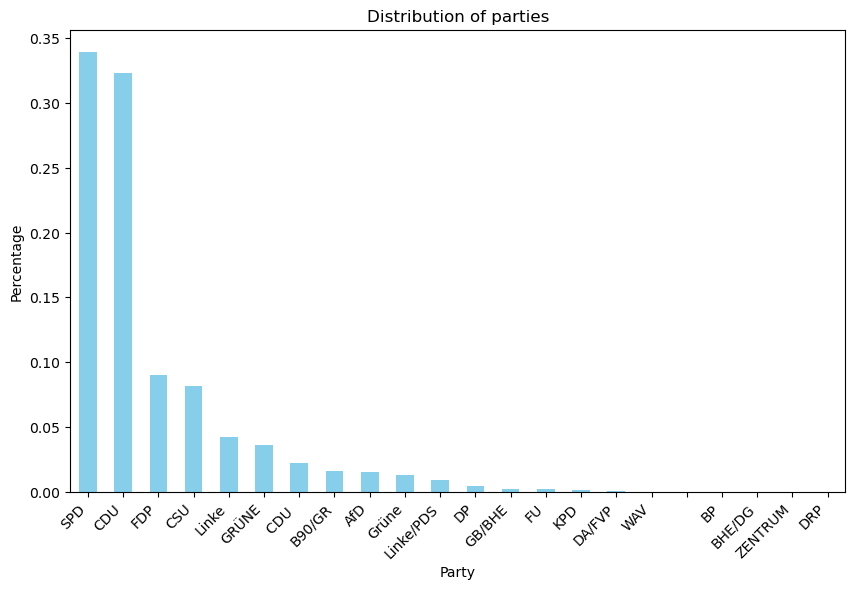

In [13]:
plt.figure(figsize=(10, 6))
ax = voting_beh['party_text'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
ax.set_title('Distribution of parties')
ax.set_xlabel('Party')
ax.set_ylabel('Percentage')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

## Missing values

In [14]:
voting_beh.isna().sum()

id_de_parliament         0
lastname                 0
firstname                0
party_det              145
ppg                    145
party_text               0
elecper                  0
office_spell           145
vote_id                  0
vote_date                0
vote_beh                 0
vote_deviate            64
mp_id_old           307856
pers_id_pdbd             0
id_de_manow              0
dtype: int64

In [16]:
vote_char.isna().sum()

vote_id              0
vote_id2             0
vote_id_elecper      0
elecper              0
source               0
                  ... 
cab_end              0
elecper_start      211
elecper_end        385
cab_parties          0
vote_date            0
Length: 65, dtype: int64

In [15]:
mp_char.isna().sum()

id_de_parliament               0
lastname                       0
firstname                      0
elecper                        0
gender                         0
year_birth                     0
date_birth                     1
date_birth_text                0
mandate_start                  0
mandate_end                    0
office_spell                   0
spell_start                    0
spell_end                      0
party_elec                     0
party_elecdet                  0
mandate                        0
mandate_detailed               0
dualcand                       0
district_id                 1463
districtvote                6595
closeness_district          1463
list                        2195
listpos                     2511
listpos_total               2623
elecsafe_district           1782
elecsafe_list               1782
elecsafe_overall            1782
minister                       0
junminister                    0
parlpres                       0
commchair 

## Merge and look for correlations

In [17]:
# merging voting_beh and mp_char as btvote
btvote = pd.merge(voting_beh, mp_char, on=['id_de_parliament', 'elecper', 'office_spell'], how='left', suffixes=['_DROP',''])

# merging vote_char and btvote
btvote = pd.merge(btvote, vote_char, on=['vote_id'], suffixes=['_DROP',''])

# droping duplicate columns
btvote.drop(btvote.filter(regex='_DROP$').columns, axis=1, inplace=True)

btvote.head()

,id_de_parliament,party_det,ppg,party_text,office_spell,vote_id,vote_beh,vote_deviate,lastname,firstname,...,gesta,cabid_parlgov,cabid_erdda,cabinet,cab_start,cab_end,elecper_start,elecper_end,cab_parties,vote_date
0,11000001.0,CDU (Christian Democratic Union),CDU/CSU,CDU,1.0,11106.0,no,no deviation,Abelein,Manfred,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
1,11000017.0,SPD (Social Democratic Party of Germany),SPD,SPD,1.0,11106.0,abstain,weak deviation,Ahrens,Karl,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
2,11000043.0,SPD (Social Democratic Party of Germany),SPD,SPD,2.0,11106.0,abstain,weak deviation,Apel,Hans,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
3,11000089.0,FDP (Free Democratic Party),FDP,FDP,1.0,11106.0,excused absence,excused absence,Bangemann,Martin,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
4,11000111.0,FDP (Free Democratic Party),FDP,FDP,1.0,11106.0,no,no deviation,Baum,Gerhart Rudolf,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25


In [ ]:
import seaborn as sns
df = pd.merge(btvote.loc['party_text'], btvote.loc['vote_beh'])
ax = sns.heatmap(df.corr(), annot=True)

In [10]:
voting_beh.describe()

,id_de_parliament,elecper,office_spell,vote_id,mp_id_old
count,1.435249e+06,1.435249e+06,1.435104e+06,1.435249e+06,1.127393e+06
mean,1.100244e+07,1.287517e+01,1.084319e+00,1.431564e+04,8.851391e+04
std,2.254169e+05,5.314821e+00,3.074604e-01,1.389731e+04,5.817338e+04
min,1.100000e+07,1.000000e+00,1.000000e+00,1.001000e+03,1.000000e+01
25%,1.100126e+07,1.100000e+01,1.000000e+00,1.101200e+04,1.002600e+04
50%,1.100248e+07,1.400000e+01,1.000000e+00,1.407800e+04,1.008120e+05
75%,1.100366e+07,1.700000e+01,1.000000e+00,1.721700e+04,1.329130e+05
max,1.100497e+07,1.900000e+01,5.000000e+00,1.811540e+05,1.828320e+05
